In [340]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [342]:
"""
Things to add:
- plot on sequence of mixed strategy, to see if converge
"""

'\nThings to add:\n- plot on sequence of mixed strategy, to see if converge\n'

In [344]:
def q_learning_2x2_game_with_plot(payoffs, T, alpha, beta0, k):
    """
    Q-learning algorithm for a finite simultaneous move game (2x2 example) with a plot of the sequence of play.

    Parameters:
        payoffs (list): A 2x2x2 list representing the payoff matrix.
                        payoffs[i][a_i][a_-i] gives the payoff for player i
                        when they choose action a_i and the opponent chooses action a_-i.
        T (int): Number of iterations.
        alpha (float): Q-value update parameter.
        beta (float): Softmax parameter for strategy computation.

    Returns:
        dict: A dictionary containing:
              - Last iterate mixed strategies
              - Average mixed strategies
              - Frequency of play
              - Action history (sequence of actions chosen)
    """
    num_players = 2
    num_actions = 2

    # Initialize Q-values for both players
    Q = [np.zeros(num_actions) for _ in range(num_players)]

    # Track mixed strategies, action frequencies, and actions over time
    strategies = []
    action_counts = [np.zeros(num_actions) for _ in range(num_players)]
    action_history = [[] for _ in range(num_players)]

    for t in range(1, T + 1):
        mixed_strategies = []
        beta = beta0 + k*t
        
        # Compute mixed strategies using the softmax function 
        for i in range(num_players):
            mixed_strategy = np.exp(beta * Q[i]) / np.sum(np.exp(beta * Q[i]))
            mixed_strategies.append(mixed_strategy)
        
        strategies.append(mixed_strategies)

        # Sample actions based on mixed strategies 
        actions = [np.random.choice(num_actions, p=mixed_strategies[i]) for i in range(num_players)]

        # Record actions
        for i in range(num_players):
            action_history[i].append(actions[i])

        # Update action counts
        for i in range(num_players):
            action_counts[i][actions[i]] += 1

        # Compute payoffs for the current actions
        rewards = [payoffs[i][actions[i]][actions[1 - i]] for i in range(num_players)]
#        rewards_counterf = [payoffs[i][1-actions[i]][actions[1-i]] for i in range(num_players)]

        # Update Q-values
        for i in range(num_players):
            Q[i][actions[i]] = (1-alpha) * Q[i][actions[i]] + rewards[i]
#            Q[i][1-actions[i]] = (1-alpha) * Q[i][1-actions[i]] + rewards_counterf[i]

    # Compute average mixed strategies and action frequencies
    avg_mixed_strategies = np.mean(strategies, axis=0)
    frequencies = [counts / T for counts in action_counts]

    return {
        "last_iterate": mixed_strategies,
        "average_mixed_strategy": avg_mixed_strategies,
        "frequency_of_play": frequencies,
        "action_history": action_history,  # Include the sequence of actions for both players
        "strategy_history": strategies
    }

In [346]:
# Example 2x2 game payoffs (HD game):
"""
payoffs = [
    [[5, 2], [7, 1]],  # Payoffs for Player 0
    [[5, 2], [7, 1]]   # Payoffs for Player 1
]
"""
"""
# Example 2x2 game payoffs (Coordination game):
payoffs = [
    [[0, 1], [2, 0]],  # Payoffs for Player 0
    [[0, 2], [1, 0]]   # Payoffs for Player 1
]
"""
# Example 2x2 game payoffs (Prisoner dilemma):
payoffs = [
    [[2, 0], [5, 0]],  # Payoffs for Player 0
    [[2, 0], [5, 0]]   # Payoffs for Player 1
]
"""
# pick a game at random
payoffs = [
    [[random.randint(0, 10), random.randint(0, 10)], [random.randint(0, 10), random.randint(0, 10)]],  # Payoffs for Player 0
    [[random.randint(0, 10), random.randint(0, 10)], [random.randint(0, 10), random.randint(0, 10)]]   # Payoffs for Player 1
]
"""

# Parameters
T = 10000
alpha = 0.3
beta = 0.01
k = 0.001
# gamma = 0.9

# Run Q-learning
results = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta, k)

# Display results
print("Last iterate mixed strategies:", results["last_iterate"])
print("Average mixed strategies:", results["average_mixed_strategy"])
print("Frequency of play:", results["frequency_of_play"])

Last iterate mixed strategies: [array([1.00000000e+00, 1.13103876e-29]), array([1.00000000e+00, 1.32393828e-26])]
Average mixed strategies: [[0.88998797 0.11001203]
 [0.86819147 0.13180853]]
Frequency of play: [array([0.8867, 0.1133]), array([0.8671, 0.1329])]


In [347]:
payoffs

[[[2, 0], [5, 0]], [[2, 0], [5, 0]]]

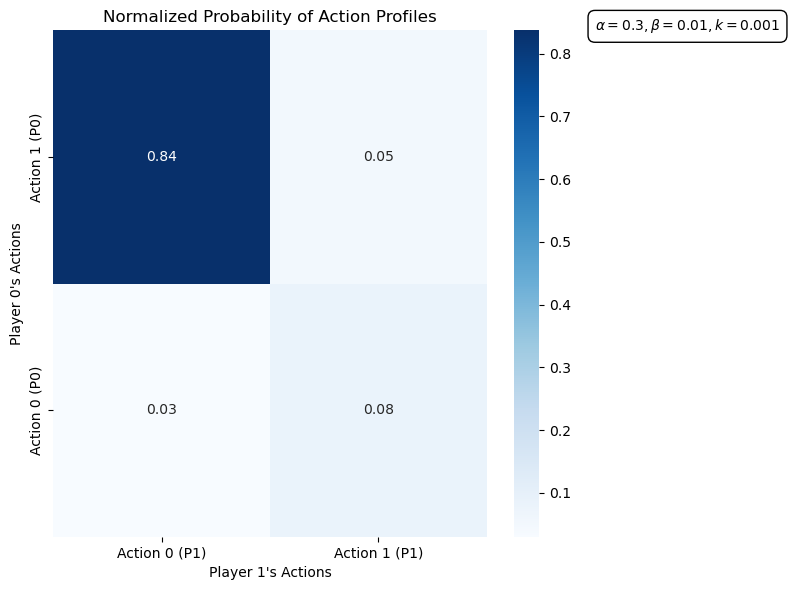

In [348]:
# Extract action history
action_history_0 = results["action_history"][0]  # Player 0's actions
action_history_1 = results["action_history"][1]  # Player 1's actions

# Compute the frequency matrix for action profiles [a_0, a_1]
num_actions = 2  # Assuming binary actions (0 and 1)
frequency_matrix = np.zeros((num_actions, num_actions), dtype=int)

# Count occurrences of each action profile
for a0, a1 in zip(action_history_0, action_history_1):
    frequency_matrix[a0, a1] += 1

# Normalize the frequency matrix to get probabilities
frequency_matrix_prob = frequency_matrix / np.sum(frequency_matrix)

# Plot the normalized frequency matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    frequency_matrix_prob, 
    annot=True, 
    fmt=".2f", 
    cmap="Blues", 
    xticklabels=["Action 0 (P1)", "Action 1 (P1)"],
    yticklabels=["Action 1 (P0)", "Action 0 (P0)"]
)
plt.title("Normalized Probability of Action Profiles")
plt.xlabel("Player 1's Actions")
plt.ylabel("Player 0's Actions")

plt.text(
    2.5, 0,   # Coordinates for the text box (adjust based on your plot)
    r"$\alpha = 0.3, \beta = 0.01, k = 0.001$", 
    fontsize=10, 
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()

plt.savefig("/Users/franc/Dropbox/ML project/code/images_fra/frequency_PrisonerDilemma.png")

plt.show()

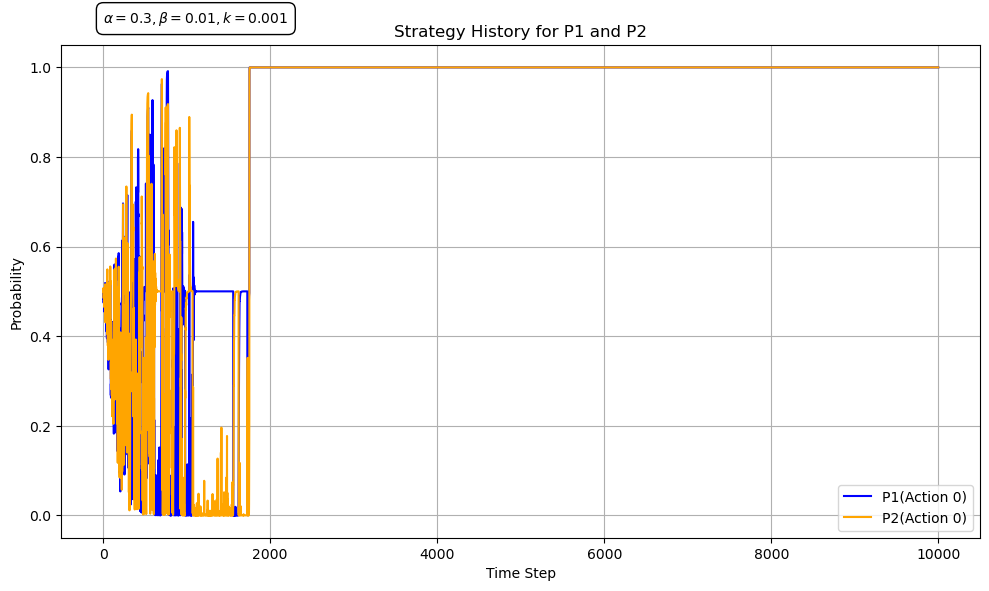

In [351]:
strategy_history = results["strategy_history"]

player_1_strategy_history = [step[0] for step in strategy_history]
player_2_strategy_history = [step[1] for step in strategy_history]

# Display the strategy history for Player 1
# print("Strategy history for Player 1:")
# for t, strategy in enumerate(player_1_strategy_history, start=1):
#     print(f"Step {t}: {strategy}")

prob_action_0_p1 = [strategy[0] for strategy in player_1_strategy_history]
prob_action_0_p2 = [strategy[0] for strategy in player_2_strategy_history]

# Plot the probabilities over time
plt.figure(figsize=(10, 6))
plt.plot(prob_action_0_p1, label="P1(Action 0)", color="blue")
plt.plot(prob_action_0_p2, label="P2(Action 0)", color="orange")
plt.xlabel("Time Step")
plt.ylabel("Probability")
plt.title("Strategy History for P1 and P2")
plt.legend()
plt.grid()

plt.text(
    2, 1.1,   # Coordinates for the text box (adjust based on your plot)
    r"$\alpha = 0.3, \beta = 0.01, k = 0.001$", 
    fontsize=10, 
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()

plt.savefig("/Users/franc/Dropbox/ML project/code/images_fra/strategy_history_plot_PrisonerDilemma.png")

plt.show()

In [353]:
"""
- the simple heuristic shows that in HD game players seem to learn to play the welfare maximizing profile
- players learn to play action 1. In the long run, it is the welfare maximizing profile

- there is not really an issue of equilibrium selection in this specific game
- further research is required for more general classes of games, where explicit results are not present in the literature


- it is not a NE nor a CE of the stage game
- by the folk theorem, can be sustained as a NE of the repeated game
"""

'\n- the simple heuristic shows that in HD game players seem to learn to play the welfare maximizing profile\n- players learn to play action 1. In the long run, it is the welfare maximizing profile\n\n- there is not really an issue of equilibrium selection in this specific game\n- further research is required for more general classes of games, where explicit results are not present in the literature\n\n\n- it is not a NE nor a CE of the stage game\n- by the folk theorem, can be sustained as a NE of the repeated game\n'

In [320]:
"""
# Map actions to labels for plotting
action_labels = ["0", "1"]

# Plot the sequence of play for each player
plt.figure(figsize=(10, 6))
plt.plot(
    results["action_history"][0],
    label="Player 0's actions",
    alpha=0.7,
    marker='o',
    linestyle='-'
)
plt.plot(
    results["action_history"][1],
    label="Player 1's actions",
    alpha=0.7,
    marker='x',
    linestyle='--'
)
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.title("Sequence of Play Over Time")
plt.yticks([0, 1], action_labels)  # Use "Cooperate" and "Defect" instead of 0 and 1
plt.legend()
plt.grid()
plt.show()

# comment: usually it goes to the NE
"""

'\n# Map actions to labels for plotting\naction_labels = ["0", "1"]\n\n# Plot the sequence of play for each player\nplt.figure(figsize=(10, 6))\nplt.plot(\n    results["action_history"][0],\n    label="Player 0\'s actions",\n    alpha=0.7,\n    marker=\'o\',\n    linestyle=\'-\'\n)\nplt.plot(\n    results["action_history"][1],\n    label="Player 1\'s actions",\n    alpha=0.7,\n    marker=\'x\',\n    linestyle=\'--\'\n)\nplt.xlabel("Time Step")\nplt.ylabel("Action")\nplt.title("Sequence of Play Over Time")\nplt.yticks([0, 1], action_labels)  # Use "Cooperate" and "Defect" instead of 0 and 1\nplt.legend()\nplt.grid()\nplt.show()\n\n# comment: usually it goes to the NE\n'

In [324]:
"""
# Example 2x2 game payoffs (HD game):


payoffs = [
    [[3, 0], [5, 1]],  # Payoffs for Player 0
    [[3, 0], [5, 1]]   # Payoffs for Player 1
]

# Parameters
T = 100
alpha = 0.6
beta = 0.7
# gamma = 0.9

# Run Q-learning
results = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)

# Display results
print("Last iterate mixed strategies:", results["last_iterate"])
print("Average mixed strategies:", results["average_mixed_strategy"])
print("Frequency of play:", results["frequency_of_play"])

# Map actions to labels for plotting
action_labels = ["0", "1"]

# Plot the sequence of play for each player
plt.figure(figsize=(10, 6))
plt.plot(
    results["action_history"][0],
    label="Player 0's actions",
    alpha=0.7,
    marker='o',
    linestyle='-'
)
plt.plot(
    results["action_history"][1],
    label="Player 1's actions",
    alpha=0.7,
    marker='x',
    linestyle='--'
)
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.title("Sequence of Play Over Time")
plt.yticks([0, 1], action_labels)  # Use "Cooperate" and "Defect" instead of 0 and 1
plt.legend()
plt.grid()
plt.show()

# comment: usually it goes to the one of the two NE in pure strategies
"""

'\n# Example 2x2 game payoffs (HD game):\n\n\npayoffs = [\n    [[3, 0], [5, 1]],  # Payoffs for Player 0\n    [[3, 0], [5, 1]]   # Payoffs for Player 1\n]\n\n# Parameters\nT = 100\nalpha = 0.6\nbeta = 0.7\n# gamma = 0.9\n\n# Run Q-learning\nresults = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)\n\n# Display results\nprint("Last iterate mixed strategies:", results["last_iterate"])\nprint("Average mixed strategies:", results["average_mixed_strategy"])\nprint("Frequency of play:", results["frequency_of_play"])\n\n# Map actions to labels for plotting\naction_labels = ["0", "1"]\n\n# Plot the sequence of play for each player\nplt.figure(figsize=(10, 6))\nplt.plot(\n    results["action_history"][0],\n    label="Player 0\'s actions",\n    alpha=0.7,\n    marker=\'o\',\n    linestyle=\'-\'\n)\nplt.plot(\n    results["action_history"][1],\n    label="Player 1\'s actions",\n    alpha=0.7,\n    marker=\'x\',\n    linestyle=\'--\'\n)\nplt.xlabel("Time Step")\nplt.ylabel("Action")\nplt.ti

In [163]:

"""
OTHER GAMES
--------------

# Example 2x2 game payoffs (coordination game):
payoffs = [
    [[0, 1], [2, 0]],  # Payoffs for Player 0
    [[0, 2], [1, 0]]   # Payoffs for Player 1
]

# Example 2x2 game payoffs (Prisoner dilemma):
payoffs = [
    [[2, 0], [5, 0]],  # Payoffs for Player 0
    [[2, 0], [5, 0]]   # Payoffs for Player 1
]

# Parameters
T = 100
alpha = 0.6
beta = 0.7
# gamma = 0.9

# Run Q-learning
results = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)

# Display results
print("Last iterate mixed strategies:", results["last_iterate"])
print("Average mixed strategies:", results["average_mixed_strategy"])
print("Frequency of play:", results["frequency_of_play"])

# Map actions to labels for plotting
action_labels = ["0", "1"]

# Plot the sequence of play for each player
plt.figure(figsize=(10, 6))
plt.plot(
    results["action_history"][0],
    label="Player 0's actions",
    alpha=0.7,
    marker='o',
    linestyle='-'
)
plt.plot(
    results["action_history"][1],
    label="Player 1's actions",
    alpha=0.7,
    marker='x',
    linestyle='--'
)
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.title("Sequence of Play Over Time")
plt.yticks([0, 1], action_labels)  # Use "Cooperate" and "Defect" instead of 0 and 1
plt.legend()
plt.grid()
plt.show()

# comment: learn the best NE
"""

'\nOTHER GAMES\n--------------\n\n# Example 2x2 game payoffs (coordination game):\npayoffs = [\n    [[0, 1], [2, 0]],  # Payoffs for Player 0\n    [[0, 2], [1, 0]]   # Payoffs for Player 1\n]\n\n# Example 2x2 game payoffs (Prisoner dilemma):\npayoffs = [\n    [[2, 0], [5, 0]],  # Payoffs for Player 0\n    [[2, 0], [5, 0]]   # Payoffs for Player 1\n]\n\n# Parameters\nT = 100\nalpha = 0.6\nbeta = 0.7\n# gamma = 0.9\n\n# Run Q-learning\nresults = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)\n\n# Display results\nprint("Last iterate mixed strategies:", results["last_iterate"])\nprint("Average mixed strategies:", results["average_mixed_strategy"])\nprint("Frequency of play:", results["frequency_of_play"])\n\n# Map actions to labels for plotting\naction_labels = ["0", "1"]\n\n# Plot the sequence of play for each player\nplt.figure(figsize=(10, 6))\nplt.plot(\n    results["action_history"][0],\n    label="Player 0\'s actions",\n    alpha=0.7,\n    marker=\'o\',\n    linestyle=\'-\'\

In [165]:
"""
# Example 2x2 game payoffs:
payoffs = [
    [[0, 2], [1, 1]],  # Payoffs for Player 0
    [[1, 1], [0, 2]],   # Payoffs for Player 1
]

# Parameters
T = 100
alpha = 0.6
beta = 0.7
# gamma = 0.9

# Run Q-learning
results = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)

# Display results
print("Last iterate mixed strategies:", results["last_iterate"])
print("Average mixed strategies:", results["average_mixed_strategy"])
print("Frequency of play:", results["frequency_of_play"])

# Map actions to labels for plotting
action_labels = ["0", "1"]

# Plot the sequence of play for each player
plt.figure(figsize=(10, 6))
plt.plot(
    results["action_history"][0],
    label="Player 0's actions",
    alpha=0.7,
    marker='o',
    linestyle='-'
)
plt.plot(
    results["action_history"][1],
    label="Player 1's actions",
    alpha=0.7,
    marker='x',
    linestyle='--'
)
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.title("Sequence of Play Over Time")
plt.yticks([0, 1], action_labels)  # Use "Cooperate" and "Defect" instead of 0 and 1
plt.legend()
plt.grid()
plt.show()

# comment: not learn the NE (2/3,2/3)
"""

'\n# Example 2x2 game payoffs:\npayoffs = [\n    [[0, 2], [1, 1]],  # Payoffs for Player 0\n    [[1, 1], [0, 2]],   # Payoffs for Player 1\n]\n\n# Parameters\nT = 100\nalpha = 0.6\nbeta = 0.7\n# gamma = 0.9\n\n# Run Q-learning\nresults = q_learning_2x2_game_with_plot(payoffs, T, alpha, beta)\n\n# Display results\nprint("Last iterate mixed strategies:", results["last_iterate"])\nprint("Average mixed strategies:", results["average_mixed_strategy"])\nprint("Frequency of play:", results["frequency_of_play"])\n\n# Map actions to labels for plotting\naction_labels = ["0", "1"]\n\n# Plot the sequence of play for each player\nplt.figure(figsize=(10, 6))\nplt.plot(\n    results["action_history"][0],\n    label="Player 0\'s actions",\n    alpha=0.7,\n    marker=\'o\',\n    linestyle=\'-\'\n)\nplt.plot(\n    results["action_history"][1],\n    label="Player 1\'s actions",\n    alpha=0.7,\n    marker=\'x\',\n    linestyle=\'--\'\n)\nplt.xlabel("Time Step")\nplt.ylabel("Action")\nplt.title("Sequence